In [1]:
from pathlib import Path
import zipfile
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.model_selection import train_test_split
sklearn.set_config(display="diagram")
np.random.seed(42)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data = pd.read_csv("dataset.csv")
data.info()

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596558 entries, 0 to 2596557
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              object 
 1   travel_fee      float64
 2   departure_time  object 
 3   departure_long  float64
 4   departure_lat   float64
 5   arrival_long    float64
 6   arrival_lat     float64
 7   occupancy       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 158.5+ MB


In [2]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

ID  travel_fee             departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy
625101   2013-06-27 18:07:00.000000180         4.5  2013-06-27 18:07:00+00:00      -73.980940      40.759717    -73.976447    40.764835          2
1336914   2013-07-27 08:55:00.00000037        16.5  2013-07-27 08:55:00+00:00      -73.973800      40.750710    -74.014455    40.703702          1
2088427  2013-08-16 11:20:00.000000124         8.0  2013-08-16 11:20:00+00:00      -74.001810      40.740705    -73.987485    40.752102          1
1612856    2013-04-23 22:42:30.0000003        14.0  2013-04-23 22:42:30+00:00      -73.993854      40.720611    -73.992844    40.760073          1
1847080  2013-04-20 19:34:00.000000256         7.5  2013-04-20 19:34:00+00:00      -73.960283      40.690125    -73.987232    40.692187          1

In [3]:
train=train.loc[train['travel_fee']>0]
train=train.loc[train['occupancy']>0]
train.shape

(2077099, 8)

In [4]:
train = train.loc[train['departure_long']!=0]
train = train.loc[train['departure_lat']!=0]
train = train.loc[train['arrival_long']!=0]
train = train.loc[train['arrival_lat']!=0]

train.eq(0).sum()

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      0
arrival_lat       0
occupancy         0
dtype: int64

In [5]:
train.shape

(2041760, 8)

In [6]:
num_attr = [
    'travel_fee', 'departure_long', 'departure_lat', 'arrival_long','arrival_lat','occupancy'
]

for column in num_attr:
    print("\nStatistics for", column)
    print("Minimum:", train[column].min())
    print("Maximum:", train[column].max())
    print("Mean:", train[column].mean())
    print("Standard deviation:", train[column].std())


Statistics for travel_fee
Minimum: 0.01
Maximum: 500.0
Mean: 12.564952158904429
Standard deviation: 10.662037892826623

Statistics for departure_long
Minimum: -740.021667
Maximum: 83.433358
Mean: -73.6110324757532
Standard deviation: 6.5135314644882545

Statistics for departure_lat
Minimum: -180.0
Maximum: 79.849171
Mean: 40.38591856263505
Standard deviation: 6.45750190766351

Statistics for arrival_long
Minimum: -1216.416667
Maximum: 73.937848
Mean: -73.61012416969446
Standard deviation: 6.5293461335502965

Statistics for arrival_lat
Minimum: -180.0
Maximum: 73.995127
Mean: 40.38642616215043
Standard deviation: 6.457317453308838

Statistics for occupancy
Minimum: 1
Maximum: 9
Mean: 1.711048311260873
Standard deviation: 1.3767518400389278


In [7]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate and add Haversine distance column to the DataFrame
train['distance_km'] = haversine_distance(train['departure_lat'],
                                                     train['departure_long'],
                                                     train['arrival_lat'],
                                                     train['arrival_long'])

# use distance instead of longitudes & latitudes

In [8]:
train['distance_km'].describe()

count    2.041760e+06
mean     3.626926e+00
std      3.419214e+01
min      0.000000e+00
25%      1.276033e+00
50%      2.192538e+00
75%      3.989618e+00
max      1.016583e+04
Name: distance_km, dtype: float64

In [9]:
train = train.loc[train['distance_km']<=100]
train.describe()

travel_fee  departure_long  departure_lat  arrival_long   arrival_lat     occupancy   distance_km
count  2.041558e+06    2.041558e+06   2.041558e+06  2.041558e+06  2.041558e+06  2.041558e+06  2.041558e+06
mean   1.256468e+01   -7.361071e+01   4.038595e+01 -7.361007e+01  4.038638e+01  1.711039e+00  3.396691e+00
std    1.065723e+01    6.457775e+00   6.457204e+00  6.457792e+00  6.457228e+00  1.376743e+00  3.704495e+00
min    1.000000e-02   -1.800000e+02  -1.800000e+02 -1.800000e+02 -1.800000e+02  1.000000e+00  0.000000e+00
25%    6.500000e+00   -7.399236e+01   4.073568e+01 -7.399164e+01  4.073478e+01  1.000000e+00  1.275943e+00
50%    9.500000e+00   -7.398208e+01   4.075286e+01 -7.398063e+01  4.075339e+01  1.000000e+00  2.192345e+00
75%    1.400000e+01   -7.396787e+01   4.076737e+01 -7.396498e+01  4.076811e+01  2.000000e+00  3.988797e+00
max    5.000000e+02    7.393785e+01   4.878085e+01  7.393785e+01  4.878085e+01  9.000000e+00  9.912915e+01

In [10]:
train = train.loc[train['travel_fee']<=300]

In [11]:
train['fee_per_km'] = np.where(train['distance_km']<1,
                                train['travel_fee'],
                                train['travel_fee']/train['distance_km'])

In [12]:
train['fee_per_km'].describe()

count    2.041554e+06
mean     4.440617e+00
std      3.044648e+00
min      5.561999e-04
25%      3.255199e+00
50%      4.014793e+00
75%      5.000000e+00
max      2.900000e+02
Name: fee_per_km, dtype: float64

In [13]:
train['departure_time'] = pd.to_datetime(train['departure_time'])

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041554 entries, 625101 to 2219110
Data columns (total 10 columns):
 #   Column          Dtype              
---  ------          -----              
 0   ID              object             
 1   travel_fee      float64            
 2   departure_time  datetime64[ns, UTC]
 3   departure_long  float64            
 4   departure_lat   float64            
 5   arrival_long    float64            
 6   arrival_lat     float64            
 7   occupancy       int64              
 8   distance_km     float64            
 9   fee_per_km      float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1), object(1)
memory usage: 171.3+ MB


In [14]:
# Extract relevant features from datetime
train['hour'] = train['departure_time'].dt.hour
train['day_of_week'] = train['departure_time'].dt.dayofweek + 1  # Adding 1 to make Monday as 1
train['day_of_month'] = train['departure_time'].dt.day
train['month'] = train['departure_time'].dt.month

# Drop the original 'departure_time' column
train.drop('departure_time', axis=1, inplace=True)

# Describe the 'departure_time' column to see its statistics
print(train[["hour", "day_of_week", "day_of_month", "month"]].describe())

               hour   day_of_week  day_of_month         month
count  2.041554e+06  2.041554e+06  2.041554e+06  2.041554e+06
mean   1.351643e+01  4.038141e+00  1.570314e+01  6.431614e+00
std    6.537902e+00  1.956506e+00  8.708991e+00  3.459355e+00
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
25%    9.000000e+00  2.000000e+00  8.000000e+00  3.000000e+00
50%    1.400000e+01  4.000000e+00  1.600000e+01  6.000000e+00
75%    1.900000e+01  6.000000e+00  2.300000e+01  1.000000e+01
max    2.300000e+01  7.000000e+00  3.100000e+01  1.200000e+01


In [15]:
dayofweek_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Create a new 'departure_day' column based on the day of the week
train['departure_day'] = train['day_of_week'].replace(dayofweek_mapping)
train.head()

ID  travel_fee  departure_long  departure_lat  arrival_long  arrival_lat  occupancy  distance_km  fee_per_km  hour  day_of_week  day_of_month  month departure_day
625101   2013-06-27 18:07:00.000000180         4.5      -73.980940      40.759717    -73.976447    40.764835          2     0.683420    4.500000    18            4            27      6      Thursday
1336914   2013-07-27 08:55:00.00000037        16.5      -73.973800      40.750710    -74.014455    40.703702          1     6.249678    2.640136     8            6            27      7      Saturday
2088427  2013-08-16 11:20:00.000000124         8.0      -74.001810      40.740705    -73.987485    40.752102          1     1.749944    4.571575    11            5            16      8        Friday
1612856    2013-04-23 22:42:30.0000003        14.0      -73.993854      40.720611    -73.992844    40.760073          1     4.388799    3.189939    22            2            23      4       Tuesday
1847080  2013-04-20 19:34:00.000000256         7.5      -73.960283      40.690125    -73.987232    40.692187          1     2.283660    3.284201    19            6            20      4      Saturday

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Split the dataset into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Define the input features (X_train) and the target variable (y_train)
X_train = train.drop(columns=['ID', 'travel_fee','departure_time'])  # Drop columns that are not features
y_train = train['travel_fee']  # Target variable

X_test = test.drop(columns=['ID', 'travel_fee','departure_time'])  # Drop columns that are not features
y_test = test['travel_fee']  # Target variable

# Display the shape of X_train and y_train to confirm
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (2077246, 5)
Shape of y_train: (2077246,)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Preprocessing: Scale numerical features
numerical_features = ['departure_long', 'departure_lat', 'arrival_long', 'arrival_lat']
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_features)],
    remainder='passthrough'
)

In [19]:
# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['departure_long',
                                                   'departure_lat',
                                                   'arrival_long',
                                                   'arrival_lat'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [20]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
predictions = pipeline.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 19.888997584881945


In [21]:
def evaluate(model):
    train_preds = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_preds, squared=False)
    val_preds = model.predict(X_test)
    val_rmse = mean_squared_error(y_test, val_preds, squared=False)
    return 'Train RMSE: {}'.format(train_rmse), 'Validation RMSE: {}'.format(val_rmse)

In [22]:
xgb = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [23]:
%%time
xgb.fit(X_train, y_train)

Wall time: 2min 20s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [24]:
evaluate(xgb)

('Train RMSE: 4.218110156130588', 'Validation RMSE: 4.461400852347666')

In [25]:
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, val_rmse

# Define your test_param_and_plot function
def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    plt.show()

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distributions (instead of a grid)
param_dist = {
    'n_estimators': np.arange(100, 200),
    'learning_rate': np.arange(0.01, 0.1),   # 0.01
    'max_depth': [3, 5],  #5
    'min_child_weight': [1, 2],
    'subsample': [0.8, 0.9], #0.9
    'colsample_bytree': [0.8, 0.9]
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV


# Create an XGBoost regressor
# Define the early stopping criteria
xgb = XGBRegressor(early_stopping_rounds=10)  

eval_set = [(X_test, y_test)]

# Perform randomized search with early stopping
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=2,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=4,
    random_state=42
)

# Fit the randomized search to your training data with early stopping
random_search.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    verbose=1  # Set verbose to 1 for early stopping messages
)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on your hold-out test data
test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))

print("Best Hyperparameters:", best_params)
print("Test RMSE with Best Model:", test_rmse)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[0]	validation_0-rmse:16.07620
[1]	validation_0-rmse:15.94819
[2]	validation_0-rmse:15.82176
[3]	validation_0-rmse:15.69669
[4]	validation_0-rmse:15.57976
[5]	validation_0-rmse:15.45757
[6]	validation_0-rmse:15.33678
[7]	validation_0-rmse:15.21761
[8]	validation_0-rmse:15.10000
[9]	validation_0-rmse:14.98375
[10]	validation_0-rmse:14.87487
[11]	validation_0-rmse:14.76119
[12]	validation_0-rmse:14.64892
[13]	validation_0-rmse:14.54385
[14]	validation_0-rmse:14.43410
[15]	validation_0-rmse:14.33364
[16]	validation_0-rmse:14.23229
[17]	validation_0-rmse:14.12643
[18]	validation_0-rmse:14.02183
[19]	validation_0-rmse:13.91822
[20]	validation_0-rmse:13.82170
[21]	validation_0-rmse:13.72093
[22]	validation_0-rmse:13.62117
[23]	validation_0-rmse:13.52819
[24]	validation_0-rmse:13.43612
[25]	validation_0-rmse:13.33980
[26]	validation_0-rmse:13.24500
[27]	validation_0-rmse:13.15096
[28]	validation_0-rmse:13.06318
[29]	validation_0-rmse:

In [34]:
taxi_predictions = pipeline.predict(X_train)

pd.DataFrame(taxi_predictions, columns = ['taxi_predictions'])

taxi_predictions
0                7.652459
1               20.815298
2                7.996326
3               14.398484
4                9.034338
...                   ...
2077241          7.671238
2077242          7.523818
2077243          6.567609
2077244          9.156237
2077245          7.944435

[2077246 rows x 1 columns]

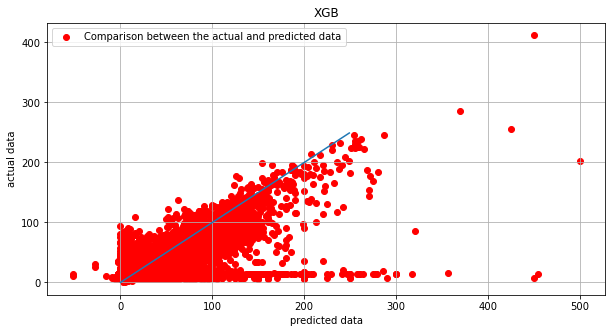

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,taxi_predictions, color="red",label="Comparison between the actual and predicted data")
plt.legend()
plt.grid()
plt.plot(range(250), range(250))
plt.title("XGB")
plt.xlabel("predicted data")
plt.ylabel("actual data")
plt.show()